<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/Aerofit_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><font color = 'blue'>Defining the Business Problem</font></H1>
This business case study is about a leading fitness equipment brand named Aerofit. It provides a range of excercising equipments such as treadmills, exercise bikes and so on. The company needs to address the following business questions :

1> To identify the characteristics of the target audience for each type of treadmill offered by the company.

2> To provide a better recommendation of the treadmills to the new customers.

3> The team decides to investigate whether there are differences across the product with respect to customer characteristics.

4> Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

5> For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

<H1><font color = 'blue'>A summary of the Aerofit Dataset</font></H1>

In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy.stats import binom

In [ ]:
#Reading the CSV file
df = pd.read_csv("aerofit_treadmill.csv")

In [ ]:
#Exploring few random rows in the given dataset.
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
142,KP781,22,Male,18,Single,4,5,48556,200
15,KP281,23,Male,16,Partnered,3,3,40932,75
75,KP281,43,Male,16,Partnered,3,3,53439,66
171,KP781,33,Female,18,Partnered,4,5,95866,200
96,KP481,24,Female,16,Single,3,3,50028,106
48,KP281,28,Male,14,Single,4,3,54576,113
118,KP481,32,Male,16,Single,4,3,60261,127
79,KP281,50,Female,16,Partnered,3,3,64809,66
32,KP281,25,Female,16,Partnered,2,2,40932,47
81,KP481,20,Male,14,Single,2,3,32973,53


In [ ]:
#Exploring the shape of Aerofit dataset
df.shape

(180, 9)

In the given aerofit dataset there are 180 records along with 9 columns.

In [ ]:
#To check the number of null values present in the given aerofit dataset
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The dataset does not suffer from any null values.


In [ ]:
# To get a comprehensive overview of aerofit dataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The following Python function reveals some of the key information related to the Aerofit dataset. First and foremost, the index range. There are 180 records ranging from 0 to 179. The next important insight that we can draw from this function is that it contains the names of all columns followed by its datatypes. The Age, Education, Usage, Fitness, Income, Miles are of the integer datatype or int64 and rest all the columns are of object datatype. In short, there are 3 columns with object datatype and 6 column with integer datatype.

Furthermore, the function also delves into the number of non-null entries in the dataset. As mentioned earlier, the dataset does not suffer from any data loss. Finally, the data frame occupies circa 12.8 kilo bytes of memory.

<H1><font color = 'blue'>Summary statistics of the Aerofit Dataset</font></H1>

In [ ]:
#To get the summary of the integer values of the Aerofit dataset
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


We can draw many interesting insights based on the above table. However, I have only included the highlights of them.

Age -> The treadmill users have an age range between 18 - 50, with an average of 28.78. This means that the younger people below the age of 18 and older people above the age 50 are less likely to buy a treadmill.

Education -> The aerofit customers have an average of 15.57 years or 16 years (median) of education.

Usage -> From the table, it is obvious that most of the customers plan to use the treadmill for 3 days per week (on average).

Fitness -> The average rating that the aerofit recieves is 3 on a scale of 1 to 5. Where 1 being poor shape and 5  being excellent shape. This rating suggests that most of the aerofit customers have a neutral opinion about the shape.

Income -> Average annual income in dollars for aerofit customer is 53719.577778.

Miles -> On average, the customers intend to run or walk on each week is approximately 103 miles.

NB : The columns Income and Miles have very large standard deviation. This means that these columns may contain outliers in it. However, further investigation is required to prove the same.

In [ ]:
# Frequency or the mode of integer values present in the aerofit dataset is shown below
# This is calculated because mode value is absent while using the describe funtion.
print("frequent age is       : ", df['Age'].mode()[0])
print("frequent Education is : ", df['Education'].mode()[0])
print("frequent Usage is     : ", df['Usage'].mode()[0])
print("frequent Fitness is   : ", df['Fitness'].mode()[0])
print("frequent Income is    : ", df['Income'].mode()[0])
print("frequent Miles is     : ", df['Miles'].mode()[0])

frequent age is       :  25
frequent Education is :  16
frequent Usage is     :  3
frequent Fitness is   :  3
frequent Income is    :  45480
frequent Miles is     :  85


In [ ]:
#Summary statistics of categorical column
df.describe(include=['object'])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


There are 3 categorical columns in the Aerofit dataset, and we can draw the following insights from it. First and foremost, there are 3 unique values present in the product column while there is only 2 unique values present in gender and marital status columns. The most frequently brought treadmill is KP281 which was purchased 80 times.

Furthermore, it is also clear that males are the frequent shoppers of aerofit treadmills. Out of 180 more than 100 customers (104 to be precise according to the data) are males. Finally, 107 aerofit customers or the most frequent customers are partnered.

<H1><font color = 'blue'>Outlier Detection - Using Boxplot (Univariate Analysis)</font></H1>

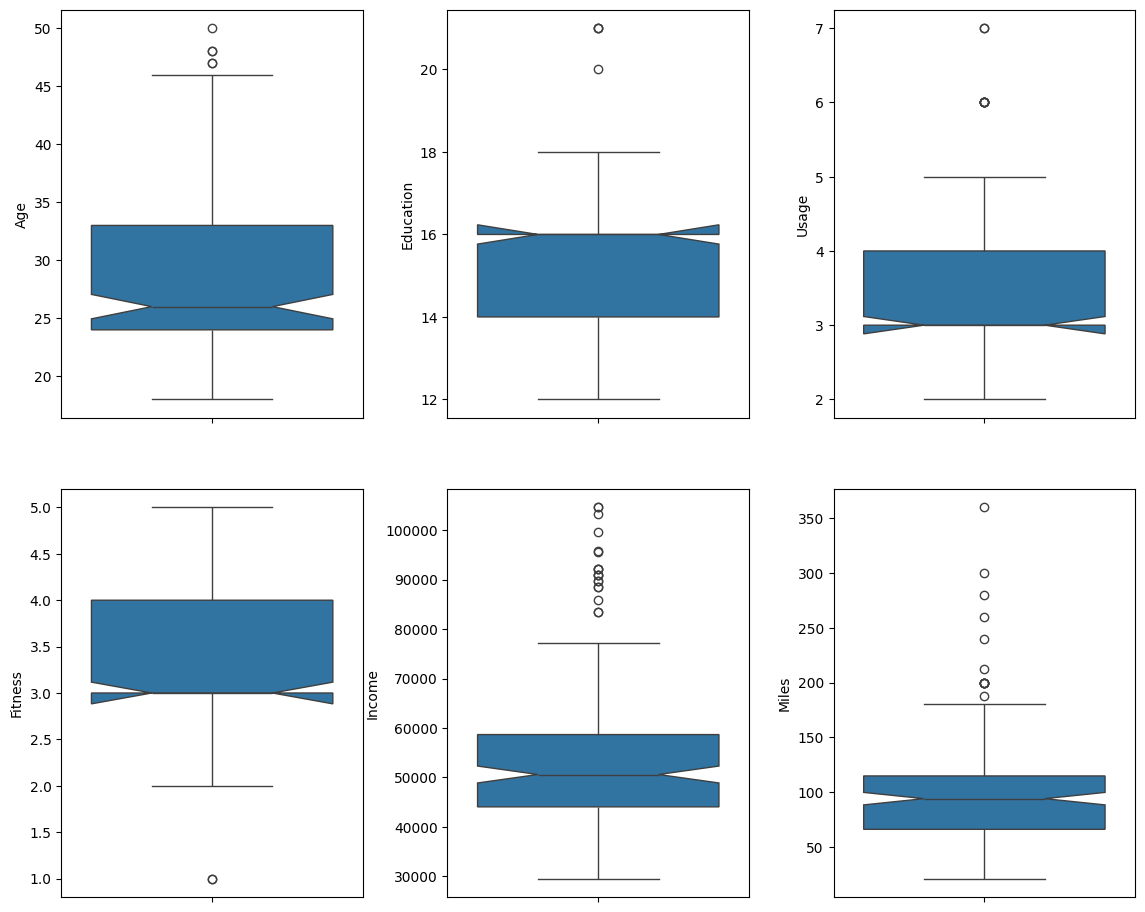

In [ ]:
#Plotting boxplots for the continous variables like age, education, usage, fitness, Income and miles
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
fig.tight_layout(pad=3.0)

sns.boxplot(df["Age"], notch=True, ax=axis[0,0])
sns.boxplot(df["Education"], notch=True, ax=axis[0,1])
sns.boxplot(df["Usage"], notch=True, ax=axis[0,2])
sns.boxplot(df["Fitness"], notch=True, ax=axis[1,0])
sns.boxplot(df["Income"], notch=True, ax=axis[1,1])
sns.boxplot(df["Miles"], notch=True, ax=axis[1,2])
plt.show()

The plot simply says that age, education, usage and fitness only has few number of outliers while income and miles have greater number of outliers.

<H1><font color = 'blue'>Outlier Detection - Using IQR</font></H1>

In [ ]:
#A funtion to detect the number of outliers above and below the thresholds
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    # Define lower and upper thresholds for outliers
    lower_threshold = q1 - 1.5 * IQR
    upper_threshold = q3 + 1.5 * IQR
    # Identify outliers
    lower_outliers = df[(df < lower_threshold)]
    upper_outliers = df[(df > upper_threshold)]
    # Return the number of outliers above and below the thresholds
    return lower_outliers.size, upper_outliers.size

In [ ]:
x, y = find_outliers_IQR(df['Age'])
print("Age Lower outliers : ", x)
print("Age Upper outliers : ", y)

Age Lower outliers :  0
Age Upper outliers :  5


From the above data, for age, it is clear that there are 0 outliers below the lower threshold and 5 outliers above the upper threshold. This may arise a subtle nuance compared to the box plot shown in the first figure (first box plot), which only shows 3 outliers. To understand this lets identify what are the outlier values in the age column.

In [ ]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
IQR=q3-q1
upper_threshold = q3 + 1.5 * IQR
df[df.Age > upper_threshold].Age.sort_values()

78     47
178    47
139    48
179    48
79     50
Name: Age, dtype: int64

As you can see that there are 5 outliers 47,47,48,48 and 50. Now if we closely monitor the first box plot of age, we can see that the max. value or the upper whisker is at about the value 47. In other words, the upper whisker is equal to the outlier value 47. As a result, 2 outliers (there are two 47's in the outlier of column age) are omitted by ```sns.boxplot(df['Age'])```.



In [ ]:
#Further outlier detections
x, y = find_outliers_IQR(df['Education'])
print("Education Lower outliers : ", x)
print("Education Upper outliers : ", y)
x, y = find_outliers_IQR(df['Usage'])
print("Usage Lower outliers : ", x)
print("Usage Upper outliers : ", y)
x, y = find_outliers_IQR(df['Fitness'])
print("Fitness Lower outliers : ", x)
print("Fitness Upper outliers : ", y)
x, y = find_outliers_IQR(df['Income'])
print("Income Lower outliers : ", x)
print("Income Upper outliers : ", y)
x, y = find_outliers_IQR(df['Miles'])
print("Miles Lower outliers : ", x)
print("Miles Upper outliers : ", y)
#The explanation for subtle nuances in the outliers using IQR and boxplot is similar to that of the explanation of Age

Education Lower outliers :  0
Education Upper outliers :  4
Usage Lower outliers :  0
Usage Upper outliers :  9
Fitness Lower outliers :  2
Fitness Upper outliers :  0
Income Lower outliers :  0
Income Upper outliers :  19
Miles Lower outliers :  0
Miles Upper outliers :  13


<H1><font color = 'blue'>Effect of categorical features on Product purchased - Bi-variate analysis </font></H1>

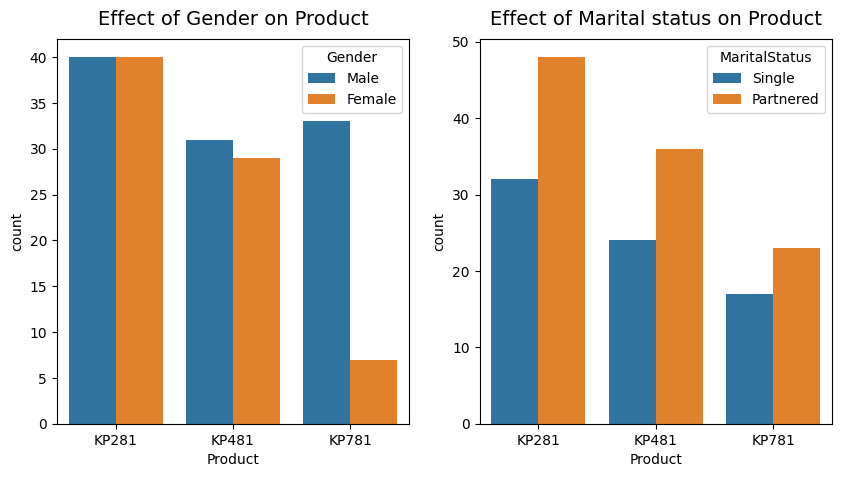

In [ ]:
#To check whether gender and marital status has any effect on product purchased
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(x=df['Product'], hue=df['Gender'], ax=axs[0])
sns.countplot(x=df['Product'], hue=df['MaritalStatus'], ax=axs[1])
axs[0].set_title("Effect of Gender on Product", pad=10, fontsize=14)
axs[1].set_title("Effect of Marital status on Product", pad=10, fontsize=14)
plt.show()

<B>Effect of gender on product purchased (Left Plot)</B> - The treadmill category KP281 was utilised by both males and females equally. Also, the KP481 treadmill category was used more by men and slightly less by women. Finally, KP781 is mostly used by males compared to females.

<B>Effect of marital status on product purchased (Right Plot)</B> - KP281, KP481 and KP781 are more used by partnered people who participate in all three categories of treadmills.

<H1><font color = 'blue'>Effect of contionus variables on Product purchased - Bi-variate Analysis</font></H1>

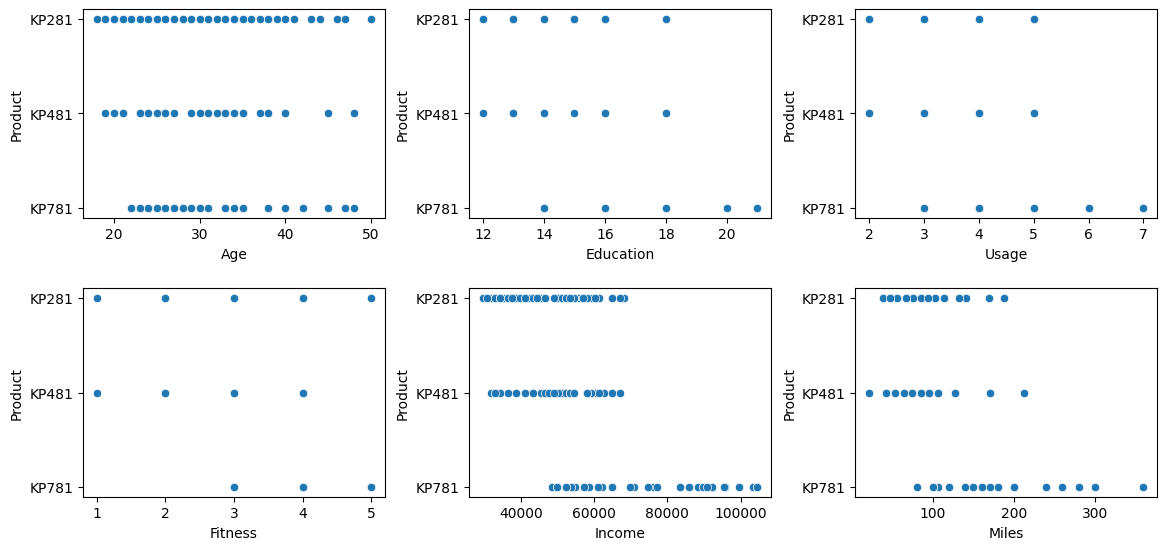

In [ ]:
#Plotting scatterplots for the continous variables like age, education, usage, fitness, Income and miles with respect to product
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.tight_layout(pad=3.0)
sns.scatterplot(x=df['Age'], y=df['Product'], ax=axis[0,0])
sns.scatterplot(x=df['Education'], y=df['Product'], ax=axis[0,1])
sns.scatterplot(x=df['Usage'], y=df['Product'], ax=axis[0,2])
sns.scatterplot(x=df['Fitness'], y=df['Product'], ax=axis[1,0])
sns.scatterplot(x=df['Income'], y=df['Product'], ax=axis[1,1])
sns.scatterplot(x=df['Miles'], y=df['Product'], ax=axis[1,2])
plt.show()

<B>Effect of Age on product</B> - It seems like KP281 and KP481 are used by all age groups. However, KP781 is used by adults whose age is over 20 years and less than 50 years.

<B>Effect of Education on product</B> - It looks like users with education less than 14 years use both KP281 and KP481, while users with education 14 years and more uses either of the 3 choices. A strange reality is that people's with education 20 years and more prefers only KP781.

<B>Effect of Usage on product</B> - Customers who use the treadmill for atleast 3 times a week to atmost 5 times a week will most probably purchase either of the three choices. However, customer who use the treadmill for 6 times or more prefers KP781 and customer who use the treadmill for 2 times or less prefers KP281.

<B>Effect of Fitness on product</B> - The customer's chances of purchasing the KP781 product increase when their fitness level increases (fitness level >= 3). It is also observed that KP781 offers premium services because of its fitness rating never gone beyond 3 while customers have mixed opinion while buying KP281 and KP481.

<B>Effect of income on product</B> - Customers with annual income greater than $45,000 and less than \$80,000 prefers either of the 3 treadmill options. People with annual income over \$80,000 only prefers to buy KP781. It is also observed that the affordable ones are KP281 and KP481, because people's with less annual income can also attain their fitness goals through thses options as well.

<B>Effect of miles on product</B> - When customers expectations are greater (>210 miles)then the chance of purchasing KP781 is higher. When the expectations are lesser than 90 miles then the usage of KP281 and KP481 is much greater.

<H1><font color='blue'>Representing the Probability</font></H1>

In [ ]:
#Calculation of marginal probability of product using cross-tab
pd.crosstab(df['Product'], df['Product'])

Product,KP281,KP481,KP781
Product,,,
KP281,80,0,0
KP481,0,60,0
KP781,0,0,40


In [ ]:
#Total number of records
df.shape[0]

180

In [ ]:
#Marginal probability of products
print("KP281 :",80/180)
print("KP481 :",60/180)
print("KP781 :",40/180)

KP281 : 0.4444444444444444
KP481 : 0.3333333333333333
KP781 : 0.2222222222222222


In [ ]:
#Alternatively, the marginal probabilities of the products can be calculated as
df['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

It is obvious that 44.44% of the customers have purchased KP281, 33.33% of the customers have purchased KP481, and 22.22% of the customers have purchased KP781.

In [ ]:
#Marginal probability of gender
df['Gender'].value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

The 57.77% of the customers are males and 42.22% of the customers are females.

In [ ]:
#Two-way contingency table based on product and gender
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [ ]:
#Total number of males and females in the aerofit dataset
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [ ]:
#This calculation is based on the contingency table and value_counts of gender
print("Given the customer is male, the probability that he chooses KP281 P(KP281|Male)     :",round(40/104,2))
print("Given the customer is male, the probability that he chooses KP481 P(KP481|Male)     :",round(31/104,2))
print("Given the customer is male, the probability that he chooses KP781 P(KP781|Male)     :",round(33/104,2))
print("Given the customer is female, the probability that he chooses KP281 P(KP281|Female) :",round(40/76,2))
print("Given the customer is female, the probability that he chooses KP481 P(KP481|Female) :",round(29/76,2))
print("Given the customer is female, the probability that he chooses KP781 P(KP781|Female) :",round(7/76,2))

Given the customer is male, the probability that he chooses KP281 P(KP281|Male)     : 0.38
Given the customer is male, the probability that he chooses KP481 P(KP481|Male)     : 0.3
Given the customer is male, the probability that he chooses KP781 P(KP781|Male)     : 0.32
Given the customer is female, the probability that he chooses KP281 P(KP281|Female) : 0.53
Given the customer is female, the probability that he chooses KP481 P(KP481|Female) : 0.38
Given the customer is female, the probability that he chooses KP781 P(KP781|Female) : 0.09


In [ ]:
#Marginal probability of Marital status
df['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

The 59.44% of the customers are partnered and 40.55% of the customers are single.

In [ ]:
#Two-way contingency table based on product and marital status
pd.crosstab(df['Product'], df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [ ]:
#Total number of partners and singles in the aerofit dataset
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [ ]:
#This calculation is based on the contingency table and value_counts of marital status
print("Given the customer is Partnered, the probability that they chooses KP281 P(KP281|Partnered) :",round(48/107,2))
print("Given the customer is Partnered, the probability that they chooses KP481 P(KP481|Partnered) :",round(36/107,2))
print("Given the customer is Partnered, the probability that they chooses KP781 P(KP781|Partnered) :",round(23/107,2))
print("Given the customer is Single, the probability that he/she chooses KP281 P(KP281|Single)     :",round(32/73,2))
print("Given the customer is Single, the probability that he/she chooses KP481 P(KP481|Single)     :",round(24/73,2))
print("Given the customer is Single, the probability that he/she chooses KP781 P(KP781|Single)     :",round(17/73,2))

Given the customer is Partnered, the probability that they chooses KP281 P(KP281|Partnered) : 0.45
Given the customer is Partnered, the probability that they chooses KP481 P(KP481|Partnered) : 0.34
Given the customer is Partnered, the probability that they chooses KP781 P(KP781|Partnered) : 0.21
Given the customer is Single, the probability that he/she chooses KP281 P(KP281|Single)     : 0.44
Given the customer is Single, the probability that he/she chooses KP481 P(KP481|Single)     : 0.33
Given the customer is Single, the probability that he/she chooses KP781 P(KP781|Single)     : 0.23


<H1><font color='blue'>correlation among different factors (Multi-variate Analysis)</font></H1>

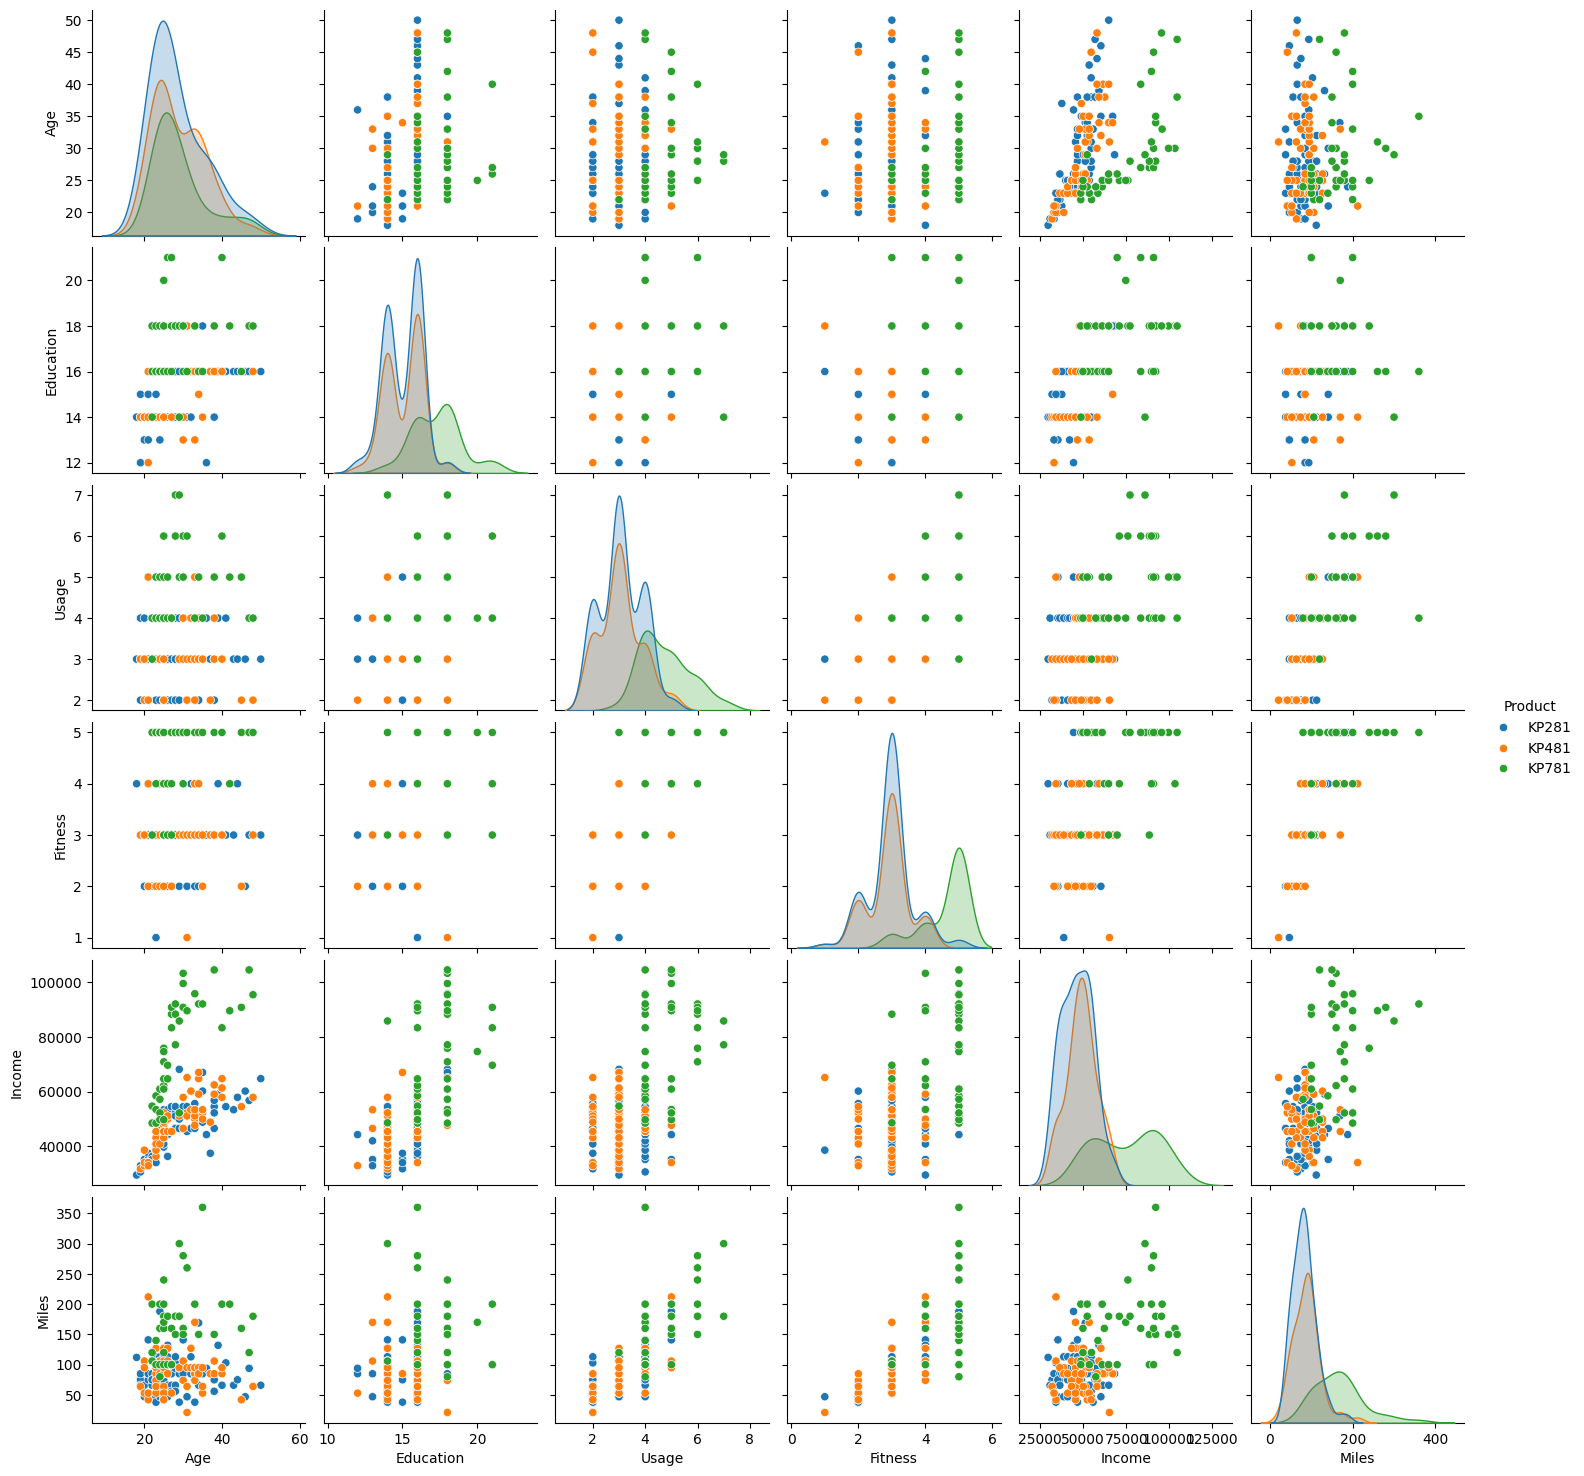

In [ ]:
#To check whether age, education, usage, fitness, income, miles has any effect on product purchased
sns.pairplot(df, hue='Product')
plt.show()

Interpreting this chart is little bit complex but I am going to address only the highlights of this chart.

<B>Point to note :

1> the chart above the diagonal and below the diagonal are same, In this insights I have only considered the charts below the diagonal.

2> the chart on the diagonal shows the spread or distribution of each contionous variable.
</B>

<I><U>Diagonal Charts - To understand the spread of each continous variables</U></I>

a) Age - The figure shows that practically all product kinds are uniformly distributed across ages. Furthermore, all three product kinds had the highest probability density value at ages between 20 and 30. For instance, if a person is 25 years old (between the ages of 20 and 30), his top pick will be KP281, followed by KP481 and KP781. However, when a person's age approaches 50, their inclination to purchase a product becomes equally likely.

b) Education - KP281 and KP481 have similar distributions that are left-skewed. However, KP781 is right-skewed. This suggests that if a person has 16 years or less of education, they are more likely to choose KP281. KP481 comes next. However, when one's education progresses beyond 16 years, the likelihood of selecting KP781 increases in comparison to the other two product categories.

c) Usage - KP281 and KP481 have similar distributions that are left-skewed. However, KP781 is right-skewed. This suggests that if a person plans to use treadmill for 3 times or less per week, they are more likely to choose KP281. KP481 comes next. However, when one's usage progresses beyond 4 times per week, the likelihood of selecting KP781 increases in comparison to the other two product categories.

d) Fitness - KP281 and KP481 are evenly distributed throughout fitness scores. However, KP781 is right-skewed. This shows that KP281 and KP481 have a higher chance of getting a self-rated fitness score of 3. KP781 does, however, have a higher chance of getting a self-rated fitness score of 5.

e) Income - KP281 and KP481 have similar distributions that are left-skewed. However, KP781 is right-skewed. This suggests that if a person's annual income is less than \$60,000, they are more likely to choose KP281 or KP481. However, when one's annual income is more than \$60,000, the likelihood of selecting KP781 increases in comparison to the other two product categories.

f) Miles - KP281 and KP481 have similar distributions that are left-skewed. However, KP781 is right-skewed. This suggests that if a person expects to achieve approximately 110 miles per week or less, then they are more likely to choose KP281. KP481 comes next. However, when one's expectation progresses beyond 110 miles per week, the likelihood of selecting KP781 increases in comparison to the other two product categories.

<I><U>Off-Diagonal charts to show the effect of 2 continous variables on product category</U></I>

<B>Effect of Education and Age on Product</B> : These 2 variables are weakly correlated. In addition, we can say that people with education more than 16 years and age greater than 20 likely to buy KP781.

<B>Effect of Usage and Age on Product</B> : These 2 variables are weakly correlated. In addition, we can say that people with usage more than 4 times per week and age greater than 20 likely to buy KP781. Likewise, people with usage less than 4 times per week and age greater than 15 prefers either KP281 or KP481. Finally, people with usage of 4 times per week and age greater than 18 prefers either KP281 or KP481 or KP781.

<B>Effect of Education and Usage on Product</B> : These 2 variables are weakly correlated. In addition, we can say that people with education 16 years or more prefers for KP781 and plan to use it for 3 times or more per week.

<B>Effect of Fitness and Age on Product</B> : These 2 variables are weakly correlated. In addition, we can say that people who buy KP781 and age greater than 20 likely to give this product a fitness rating score of 4 or greater than 4.

<B>Effect of Fitness and Education on Product</B> : These 2 variables are weakly correlated. In addition, we can say that people who buy KP781 and education of 16 years or more is likely to give this product a fitness rating score greater than 3.

<B>Effect of Fitness and Usage on Product</B> : These 2 variables are somewhat correlated. That means, as the usage increases fitness score may also increases. In addition, we can say that people who buy KP781 and use it for 4 times or more per week is likely to give this product a fitness rating score greater than 3.

<B>Effect of Income and Age on Product</B> : These 2 variables are somewhat correlated. That means, as the age increases annual income may also increases. In addition, we can say that people who buy KP781 over the age of 20 tends to have higher annual income. On the other hand, people with annual income \$65,000 or less prefers to go for KP281 or KP481.

<B>Effect of Income and Education on Product</B> : These 2 variables are somewhat correlated. That means, as the education in years increases annual income may also increases. In addition, we can say that people who buy KP781 and education over 16 years tends to have higher annual income. On the other hand, people with annual income \$65,000 or less and education less than 16 years prefers to go for either KP281 or KP481.

<B>Effect of Income and Usage on Product</B> : These 2 variables are somewhat correlated. That means, as the usage increases annual income may also increases. In addition, we can say that people who buy KP781 and usage over 4 times per week or more tends to have higher annual income. On the other hand, people with annual income \$65,000 or less and usage per week is less than 4 prefers to buy either KP281 or KP481.

<B>Effect of Income and Fitness on Product</B> : These 2 variables are weekly correlated. In addition, we can say that people who buy KP781 and annual income over \$50,000 gives this product a fitness rating score of 5.

<B>Effect of Miles and Age on Product</B> : These 2 variables are weekly correlated. In addition, we can see a concentrated scatter plot towards the left bottom of the picture. From this, we can say that people who buy KP281 or KP481 with age less than 30 use it achieve 150 miles or less per week.

<B>Effect of Miles and Education on Product</B> : These 2 variables are weekly correlated. In addition, we can say that people who buy KP781 with an education of 16 years tends to have higher expectations and most likely to cover more than 150 miles per week.

<B>Effect of Miles and Usage on Product</B> : These 2 variables are strongly correlated. This means that, as the usage increases the miles coverd also increases. In addition, we can say that people who buy KP781 and use it for 6 times per week or more tends to cover more than 150 miles.

<B>Effect of Miles and Fitness on Product</B> : These 2 variables are strongly correlated. This means that, as the fitness rating increases the miles coverd also increases. In addition, we can say that people who buy KP781 and covers a distance of 150 miles or more, gives this product a rating of 5.

<B>Effect of Miles and Income on Product</B> : These 2 variables are weekly correlated. In addition, we can see a concentrated scatter plot towards the left bottom of the picture. From this, we can say that people who buy KP281 or KP481 with annual income less than \$65,000 uses it to achieve 150 miles or less per week.


<H1><font color='blue'>Customer profiling and recommendation</font></H1>

In [ ]:
#Creating a customer profile and displaying 10 random samples
customer_profile = pd.DataFrame()
customer_profile['Age'] = df['Age']
customer_profile['Gender'] = df['Gender']
customer_profile['Income'] = df['Income']
customer_profile['Product'] = df['Product']
customer_profile.sort_values(by='Income', ascending=True, inplace=True)
customer_profile.sample(10)

,Age,Gender,Income,Product
1,19,Male,31836,KP281
52,29,Female,50028,KP281
137,40,Male,64809,KP481
18,23,Female,38658,KP281
129,35,Male,53439,KP481
111,27,Male,45480,KP481
54,30,Male,54576,KP281
32,25,Female,40932,KP281
96,24,Female,50028,KP481
26,24,Female,46617,KP281


In [ ]:
#Identifying minimum, maximum and total count of the income column
print("min income",customer_profile['Income'].min())
print("max income",customer_profile['Income'].max())
print("Total count",customer_profile['Income'].count())

min income 29562
max income 104581
Total count 180


In [ ]:
# Define the function to categorize income
def categorize_income(income):
    if income < 30000:
        return 'low income'
    elif income >= 30000 and income < 50000:
        return 'income range 1'
    elif income >= 50000 and income < 70000:
        return 'income range 2'
    elif income >= 70000 and income < 90000:
        return 'income range 3'
    else:
        return 'rich'

customer_profile['Income Category'] = customer_profile['Income'].apply(categorize_income)
customer_profile.sample(10)

,Age,Gender,Income,Product,Income Category
56,31,Female,45480,KP281,income range 1
176,42,Male,89641,KP781,income range 3
118,32,Male,60261,KP481,income range 2
134,38,Male,59124,KP481,income range 2
0,18,Male,29562,KP281,low income
145,23,Male,48556,KP781,income range 1
69,38,Female,54576,KP281,income range 2
7,21,Male,32973,KP281,income range 1
70,38,Male,52302,KP281,income range 2
23,24,Female,44343,KP281,income range 1


The income is categorised into 5 groups. The low income group where the income is less than \$30000. if income is in between \$30000 and \$50000 then it is income range 1. if income is in between \$50000 and \$70000 then it is income range 2. if income is in between \$70000 and \$90000 then it is income range 3 and greater than \$90000 then it is categorised as rich.

In [ ]:
#Seggregating customer profile for KP281
customer_profile_KP281 = customer_profile[customer_profile['Product'] == 'KP281']
customer_profile_KP281 = customer_profile_KP281.groupby(['Age','Gender','Income Category'])['Product'].value_counts().reset_index(name='Count')
customer_profile_KP281.sample(10)

,Age,Gender,Income Category,Product,Count
51,47,Male,income range 2,KP281,1
45,39,Male,income range 2,KP281,1
12,24,Male,income range 1,KP281,2
33,32,Male,income range 2,KP281,1
8,22,Male,income range 1,KP281,1
44,38,Male,income range 2,KP281,2
28,30,Male,income range 1,KP281,1
20,27,Female,income range 1,KP281,2
43,38,Male,income range 1,KP281,1
26,29,Female,income range 2,KP281,1


The customer profile is then segregated into KP281 category only, and took random 10 samples.

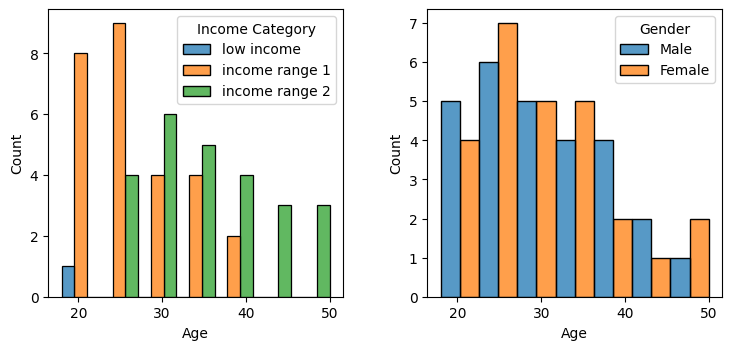

In [ ]:
#Plotting a histogram to find the customer characteristics of KP281
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.tight_layout(pad=3.0)
sns.histplot(data=customer_profile_KP281, x='Age', hue='Income Category',multiple='dodge',ax=axis[0])
sns.histplot(data=customer_profile_KP281, x='Age', hue='Gender',multiple='dodge',ax=axis[1])
plt.show()

The KP281 is used by all age groups and gender with salary ranging from low income to income range 2. if we closely observe the income category over the age, we can see that as the age increases income range 1 decreases and income range 2 increases. Both males and females buy this product. There is only one male whose age is less than 20 with low income has brought this product and 2 females who is of age 50 with annual salary of income range 2 has brought this product. Over the age of 40, individuals only belongs to the income range 2.

In [ ]:
#Seggregating customer profile for KP481
customer_profile_KP481 = customer_profile[customer_profile['Product'] == 'KP481']
customer_profile_KP481 = customer_profile_KP481.groupby(['Age','Gender','Income Category'])['Product'].value_counts().reset_index(name='Count')
customer_profile_KP481.sample(10)

,Age,Gender,Income Category,Product,Count
29,35,Male,income range 2,KP481,2
14,26,Female,income range 2,KP481,1
4,21,Male,income range 1,KP481,2
28,35,Female,income range 2,KP481,2
22,32,Male,income range 2,KP481,2
17,29,Female,income range 2,KP481,1
34,40,Male,income range 2,KP481,1
36,48,Male,income range 2,KP481,1
26,34,Female,income range 2,KP481,1
10,25,Female,income range 1,KP481,5


The customer profile is then segregated into KP481 category only, and took random 10 samples.

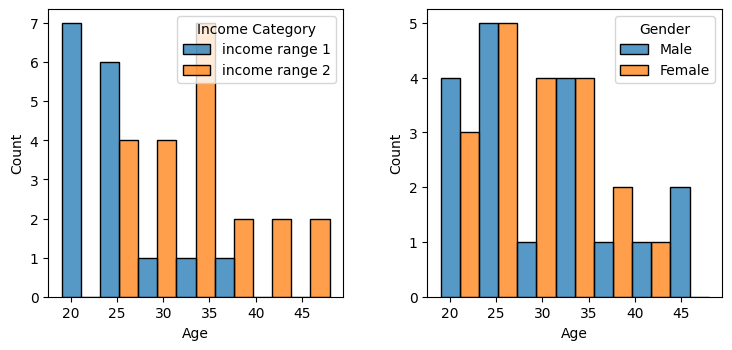

In [ ]:
#Plotting a histogram to find the customer characteristics of KP481
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.tight_layout(pad=3.0)
sns.histplot(data=customer_profile_KP481, x='Age', hue='Income Category',multiple='dodge',ax=axis[0])
sns.histplot(data=customer_profile_KP481, x='Age', hue='Gender',multiple='dodge',ax=axis[1])
plt.show()

The KP481 is also used by all age groups and gender with salary ranging from income range 1 to income range 2. if we closely observe the income category over the age, we can see that as the age increases income range 1 decreases and income range 2 increases. Both males and females buy this product. Customers, including male/female whose age around 25 and less belongs to the income range 1 has prefer this product more compared to other age groups. The customers whose age around 37 and more belongs to the income range 2. Finally, only 2 males, over the age of 45 and belongs to income range 2 has purchased this product.

The customer profile is then segregated into KP781 category only, and took random 10 samples.

In [ ]:
#Seggregating customer profile for KP781
customer_profile_KP781 = customer_profile[customer_profile['Product'] == 'KP781']
customer_profile_KP781 = customer_profile_KP781.groupby(['Age','Gender','Income Category'])['Product'].value_counts().reset_index(name='Count')
customer_profile_KP781.sample(10)

,Age,Gender,Income Category,Product,Count
17,28,Male,income range 3,KP781,2
12,26,Female,income range 2,KP781,1
31,48,Male,rich,KP781,1
18,29,Male,income range 2,KP781,1
23,33,Female,rich,KP781,1
25,35,Male,rich,KP781,1
11,25,Male,income range 3,KP781,3
22,31,Male,income range 3,KP781,1
10,25,Male,income range 2,KP781,2
29,45,Male,rich,KP781,1


The customer profile is then segregated into KP781 category only, and took random 10 samples.

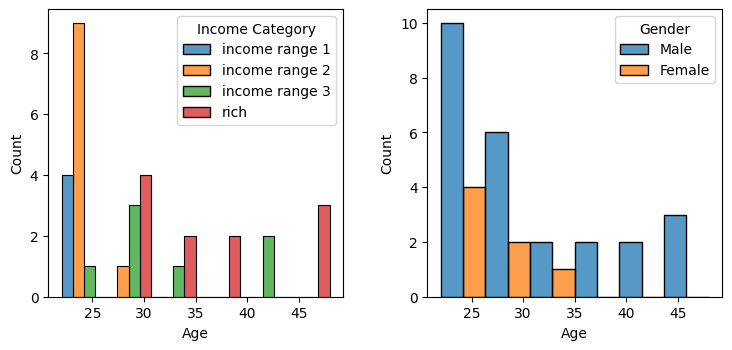

In [ ]:
#Plotting a histogram to find the customer characteristics of KP781
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.tight_layout(pad=3.0)
sns.histplot(data=customer_profile_KP781, x='Age', hue='Income Category',multiple='dodge',ax=axis[0])
sns.histplot(data=customer_profile_KP781, x='Age', hue='Gender',multiple='dodge',ax=axis[1])
plt.show()

KP781 is a preferable choice to all age groups over 20 years old and belongs to the income category that ranges from income range 1 to rich. We can observe the similar pattern of income range variations. That is, as the age increases income range 1 and income range 2 decreases while income range 3 and rich increases. Furthermore, as the age increses the number of female users decreases and beyond 35 years there is no single female user who opt KP781. However, when the age increases the number of male users decreases and beyond 35 years only male users who are classified into either income range 3 or mostly belongs to rich category have purchased the KP781 product.

<H1><font color='blue'>General Recommendations</font></H1>

> The analysis proves that KP781 is an ideal choice for all age categories, however it is most likely to be afford by individual's with higher income. One possible suggestion, to maximise the sales of this product is to give a seasonal discount to this product, such that, the customers will get a quality product at a resonable rate.

> KP781 is less used by females over the age of 35. Two possible reason for this situation could be either its higher price or its advanced features. If high price is the reason, then I highly recommend the company to offer a seasonal discount. If advanced features of this product is an obstacle for female users then, I highly recommend the company to provide a guided instructor session for female users atleast once per week.

> Both singles and partners like KP281, this is because it is cheaper and it is an entry level treadmill. However, I highly recommend the partnered users to purchase a KP781 because of its higher ratings. It is hard for a single user to afford KP781, but if both individuals (partnered users) have an annual income then KP781 is an ideal choice for patnered users.

<B>Recommendation based on age </B>: It is ideal for people's with age over 35 to opt for KP781, because the analysis shows that KP781 is used by most of the people with higher age. However, KP281 and KP481 will be an ideal choice for people's with age less than 35.

<B>Recommendation based on education </B>: It is ideal for people's with education 16 years or more to opt for KP781. One possible reason for this could be is that, gym's have become mandatory in every college or university and pupil's may come across with KP781 model treadmills. Therefore, they have some practise with such treadmills, which is why, I highly recommend customers with higher education (>= 16 years) to opt for KP781. If not, KP281 & KP481 are ideal choices.

<B>Recommendation based on usage </B>: if a person plans to use the treadmill for more than 3 times per week, then I strongly suggests such individuals to opt for KP781. If not, KP281 and KP481 are ideal choices.

<B>Recommendation based on fitness-rating </B>: According to customer ratings KP281 and KP481 has mixed ratings. If you are an individual and fitness-rating is the only thing that matters to you then, I suggests you to opt for KP781.

<B>Recommendation based on Income </B>: If you are an individual with an annual income less than \$65,000 then I strogly suggests you to buy a KP281 or KP481. However, if your annual income is greater than \$65,000 then you can choose KP781.

<B>Recommendation based on Miles </B>: Miles covered is a vital part to achieve the fitness goal. If an individual plans to cover more than 150 miles per week, then with the help of advanced features KP781 is a good choice.However, If an individual plans to cover less than 150 miles per week, then KP281 or KP481 is a good choice.

While purchasing a treadmill, it is also essential to ask the customer whether they are freashers in using a treadmill. If so, then it is good for such customer to opt for KP281. Nevertheless, if an individual has some experience in using the treadmill then KP481 is a good choice.